# Load feature dataset

In [113]:
import pandas as pd

path = './data/openface-features/'

LABELS = ['Apert','Angleman','FragileX','Sotos','Williams','22q11','Down','Progeria','Turner','TreacherCollins','CDL','Marfan']


In [114]:
X_train = pd.read_csv(path+'Train/reps.csv', header=None)
print(X_train.shape)
labels_train = pd.read_csv(path+'Train/labels.csv', header=None)
labels_train.columns = ['class','file']
y_train = labels_train['class'] - 1
print(labels_train.shape)

(2114, 128)
(2114, 2)


In [115]:
X_val = pd.read_csv(path+'Validate/reps.csv', header=None)
print(X_val.shape)
labels_val = pd.read_csv(path+'Validate/labels.csv', header=None)
labels_val.columns = ['class','file']
y_val = labels_val['class'] - 1
print(labels_val.shape)

(281, 128)
(281, 2)


In [116]:
X_test = pd.read_csv(path+'Test/reps.csv', header=None)
print(X_test.shape)
labels_test = pd.read_csv(path+'Test/labels.csv', header=None)
labels_test.columns = ['class','file']
y_test = labels_test['class'] - 1
print(labels_test.shape)

(639, 128)
(639, 2)


In [117]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

Y_train = encoder.fit_transform(y_train)
Y_test = encoder.transform(y_test)
Y_val = encoder.transform(y_val)

# SVM

In [118]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-0.14953606  0.3042498   0.22821119 ... -0.30679587  0.12664514
  -0.36206079]
 [ 0.08063773 -0.10597964 -0.23941876 ...  0.24884782 -0.44947561
   0.2485015 ]
 [ 0.1752573  -0.38200645 -0.15982927 ...  0.21284982 -0.05093919
   0.12502219]
 ...
 [-0.18490247 -0.44221676 -0.24452274 ... -0.0344877   0.01617329
  -0.0633925 ]
 [ 0.38576479 -0.15696773 -0.42241287 ...  0.0584175   0.12233508
  -0.0677096 ]
 [-0.1974567   0.22656111  0.17881358 ...  0.12846542 -0.18955284
   0.20163729]]
[-1.02898025 -1.05323647 -0.50594037 -0.98795802 -0.88717391 -1.0316798
 -0.93295655 -1.43913612 -1.01360634 -1.45112031 -0.68446113 -0.96894259]


In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.5127719962157048


Text(69.0, 0.5, 'Actual')

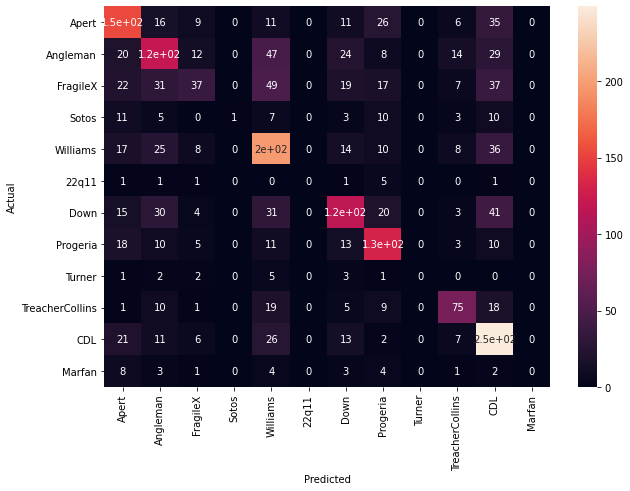

In [120]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.4428794992175274


Text(69.0, 0.5, 'Actual')

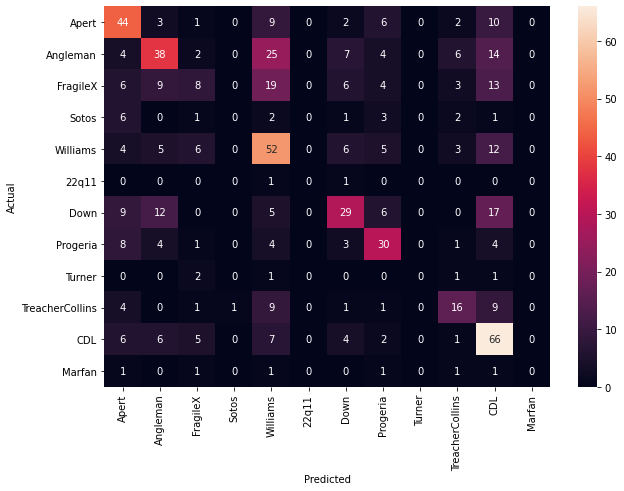

In [122]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_val,y_pred)

accuracy 0.6334519572953736


Text(69.0, 0.5, 'Actual')

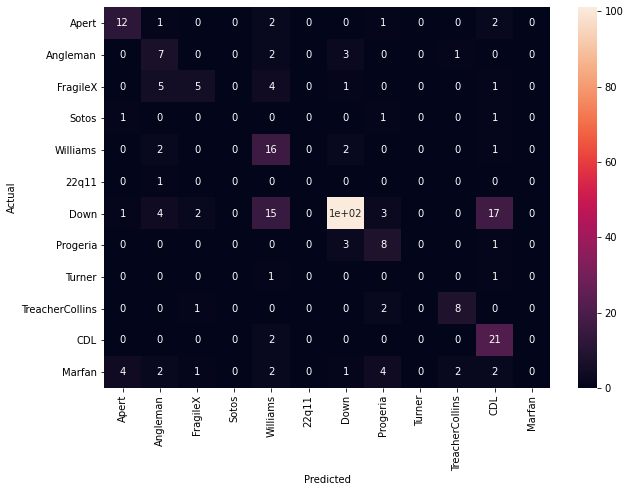

In [124]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Neural Net

In [168]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(50,25), max_iter=2000, verbose=True)
clf.fit(X_train, y_train)

#(100, 50)

Iteration 1, loss = 2.44367627
Iteration 2, loss = 2.39189433
Iteration 3, loss = 2.34835996
Iteration 4, loss = 2.29784561
Iteration 5, loss = 2.22698846
Iteration 6, loss = 2.13724226
Iteration 7, loss = 2.05094500
Iteration 8, loss = 1.97747287
Iteration 9, loss = 1.91711979
Iteration 10, loss = 1.87096251
Iteration 11, loss = 1.82973210
Iteration 12, loss = 1.79455514
Iteration 13, loss = 1.76287910
Iteration 14, loss = 1.73312774
Iteration 15, loss = 1.70742459
Iteration 16, loss = 1.68325447
Iteration 17, loss = 1.66220467
Iteration 18, loss = 1.64453100
Iteration 19, loss = 1.62666353
Iteration 20, loss = 1.61019281
Iteration 21, loss = 1.59513619
Iteration 22, loss = 1.58045390
Iteration 23, loss = 1.56829000
Iteration 24, loss = 1.55645699
Iteration 25, loss = 1.54392236
Iteration 26, loss = 1.53491842
Iteration 27, loss = 1.52260947
Iteration 28, loss = 1.51266632
Iteration 29, loss = 1.50408828
Iteration 30, loss = 1.49420100
Iteration 31, loss = 1.48588647
Iteration 32, los

Iteration 253, loss = 0.90686497
Iteration 254, loss = 0.90625896
Iteration 255, loss = 0.90229029
Iteration 256, loss = 0.90136819
Iteration 257, loss = 0.90178250
Iteration 258, loss = 0.90051888
Iteration 259, loss = 0.89862037
Iteration 260, loss = 0.89746686
Iteration 261, loss = 0.89641439
Iteration 262, loss = 0.89350035
Iteration 263, loss = 0.89391232
Iteration 264, loss = 0.89153725
Iteration 265, loss = 0.89423891
Iteration 266, loss = 0.89131493
Iteration 267, loss = 0.88734216
Iteration 268, loss = 0.88700297
Iteration 269, loss = 0.88516203
Iteration 270, loss = 0.88395779
Iteration 271, loss = 0.88288225
Iteration 272, loss = 0.88136600
Iteration 273, loss = 0.88032942
Iteration 274, loss = 0.88067807
Iteration 275, loss = 0.88016688
Iteration 276, loss = 0.87757187
Iteration 277, loss = 0.87629415
Iteration 278, loss = 0.87347890
Iteration 279, loss = 0.87150693
Iteration 280, loss = 0.87164960
Iteration 281, loss = 0.87092069
Iteration 282, loss = 0.87060466
Iteration 

Iteration 504, loss = 0.66493496
Iteration 505, loss = 0.66457449
Iteration 506, loss = 0.66531693
Iteration 507, loss = 0.66314557
Iteration 508, loss = 0.66273864
Iteration 509, loss = 0.66284232
Iteration 510, loss = 0.66114430
Iteration 511, loss = 0.65919365
Iteration 512, loss = 0.66049320
Iteration 513, loss = 0.65742854
Iteration 514, loss = 0.65710681
Iteration 515, loss = 0.65560632
Iteration 516, loss = 0.65704275
Iteration 517, loss = 0.65750245
Iteration 518, loss = 0.65454567
Iteration 519, loss = 0.65311580
Iteration 520, loss = 0.65257689
Iteration 521, loss = 0.65628137
Iteration 522, loss = 0.65729369
Iteration 523, loss = 0.65519167
Iteration 524, loss = 0.65438690
Iteration 525, loss = 0.65092081
Iteration 526, loss = 0.65060951
Iteration 527, loss = 0.64942576
Iteration 528, loss = 0.64895976
Iteration 529, loss = 0.64665788
Iteration 530, loss = 0.64517686
Iteration 531, loss = 0.65115625
Iteration 532, loss = 0.64491927
Iteration 533, loss = 0.64954927
Iteration 

Iteration 754, loss = 0.50735541
Iteration 755, loss = 0.50828263
Iteration 756, loss = 0.50749079
Iteration 757, loss = 0.51124544
Iteration 758, loss = 0.50661897
Iteration 759, loss = 0.50479639
Iteration 760, loss = 0.50493276
Iteration 761, loss = 0.50722137
Iteration 762, loss = 0.50227421
Iteration 763, loss = 0.50634457
Iteration 764, loss = 0.50195733
Iteration 765, loss = 0.50198736
Iteration 766, loss = 0.50256886
Iteration 767, loss = 0.50041195
Iteration 768, loss = 0.49977995
Iteration 769, loss = 0.50096844
Iteration 770, loss = 0.50084774
Iteration 771, loss = 0.49844434
Iteration 772, loss = 0.49702739
Iteration 773, loss = 0.49614725
Iteration 774, loss = 0.49384275
Iteration 775, loss = 0.49486607
Iteration 776, loss = 0.49486423
Iteration 777, loss = 0.49330971
Iteration 778, loss = 0.49660933
Iteration 779, loss = 0.49553360
Iteration 780, loss = 0.49099236
Iteration 781, loss = 0.49118055
Iteration 782, loss = 0.49246966
Iteration 783, loss = 0.48928587
Iteration 

Iteration 1011, loss = 0.37013411
Iteration 1012, loss = 0.36984251
Iteration 1013, loss = 0.37114180
Iteration 1014, loss = 0.37014885
Iteration 1015, loss = 0.36816225
Iteration 1016, loss = 0.36787520
Iteration 1017, loss = 0.36610836
Iteration 1018, loss = 0.36756397
Iteration 1019, loss = 0.36772036
Iteration 1020, loss = 0.36786199
Iteration 1021, loss = 0.36704419
Iteration 1022, loss = 0.36683681
Iteration 1023, loss = 0.36510980
Iteration 1024, loss = 0.36288498
Iteration 1025, loss = 0.36254815
Iteration 1026, loss = 0.36286947
Iteration 1027, loss = 0.36353266
Iteration 1028, loss = 0.36114815
Iteration 1029, loss = 0.36165404
Iteration 1030, loss = 0.36401654
Iteration 1031, loss = 0.36091380
Iteration 1032, loss = 0.36194832
Iteration 1033, loss = 0.36005614
Iteration 1034, loss = 0.35856038
Iteration 1035, loss = 0.36017301
Iteration 1036, loss = 0.36046807
Iteration 1037, loss = 0.36041998
Iteration 1038, loss = 0.35925245
Iteration 1039, loss = 0.35889132
Iteration 1040

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.9299905392620624


Text(69.0, 0.5, 'Actual')

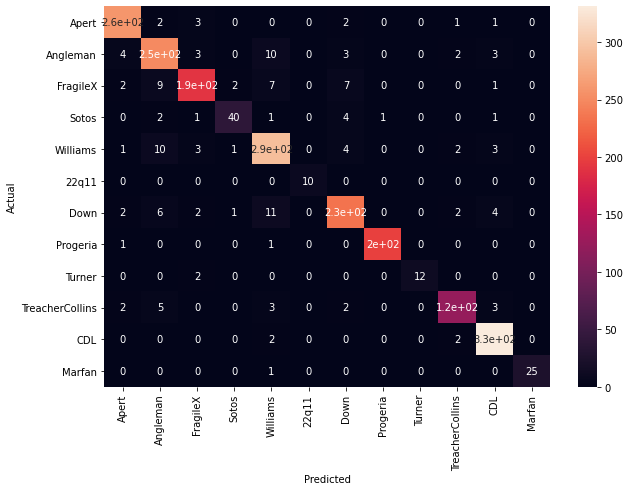

In [176]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.4522691705790297


Text(69.0, 0.5, 'Actual')

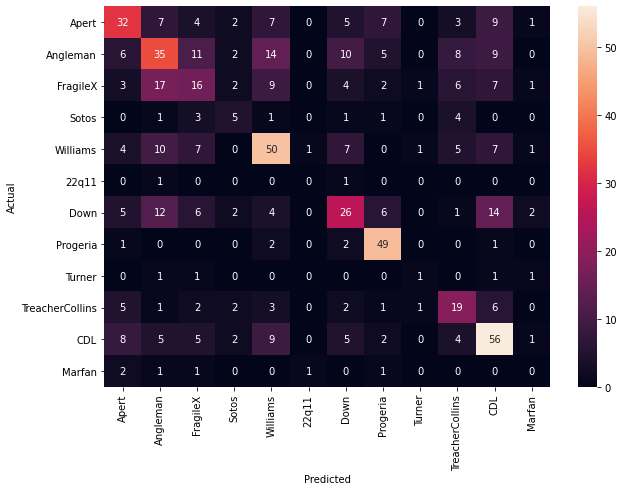

In [178]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_val,y_pred)

accuracy 0.7829181494661922


Text(69.0, 0.5, 'Actual')

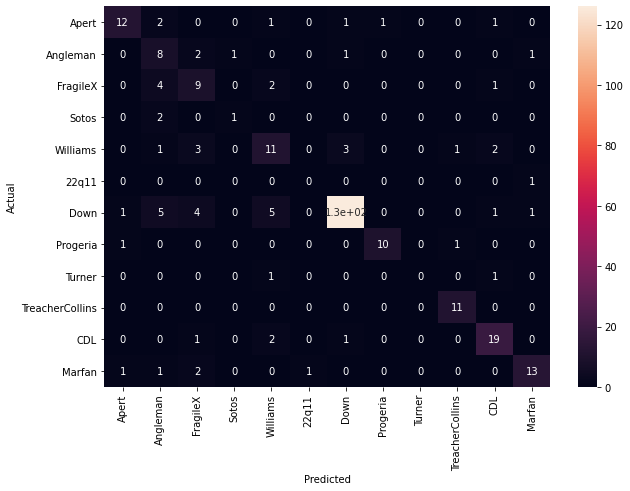

In [180]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')